# Capitulo 4: Aspectos básicos do NumPy: arrays e computação vetorizada
-------------------------------------------------------------------------

- **`ndarray`**, um eficiente array multidimensional que fornece operações aritméticas rápidas baseadas em arrays e recursos flexíveis de **broadcasting**. Ele é um contêiner rápido e flexível para grandes conjuntos de dados em Python.

In [1]:
import numpy as np
data = np.array([[1.5,-0.1,3],[0,-3,6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [2]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [3]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

>Um ndarray é um contêiner multidimensional genérico para dados homogêneos; isto é, todos os elementos devem ser do mesmo tipo.

>shape: Uma tupla que indica o tamanho de cada dimensão, e um dtype, um objeto que descreve o tipo de dado do array

In [4]:
data.shape

(2, 3)

In [5]:
data.dtype

dtype('float64')

A maneira mais fácil de criar um array é usando a função **`array`**.

In [7]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Sequências aninhadas, como uma lista de listas de mesmo tamanho, serão convertidas em um array multidimensional

In [9]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Já que `data2` era uma lista de listas, o array NumPy `arr2` tem duas dimensões, com a forma sendo inferida a partir dos dados. Podemos confirmar isso inspecionando os atributos `rdim` e `shape`

In [12]:
arr2.ndim

2

In [13]:
arr2.shape

(2, 4)

`numpy.zeros` e `numpy.ones` criam arrays de 0s ou 1s.
`numpy.empty` cria um array sem inicializá-lo com nenhum valor específico.

In [14]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((2,3,2))

# Essa função retorna memória não inicializada e, portanto, pode conter "lixo" com valores diferentes de zero. Você só deve usá-la se quiser preencher
# o novo array com dados.

array([[[8.18682324e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 9.41822545e-067]],

       [[6.37722550e-067, 2.65259513e-032],
        [4.90751422e-062, 3.44267915e+175],
        [2.77489122e+180, 4.08536709e-033]]])

`numpy.arange` é uma versão da função interna Python `range` cujo valor é um array:

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [24]:
#dtype
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int32')

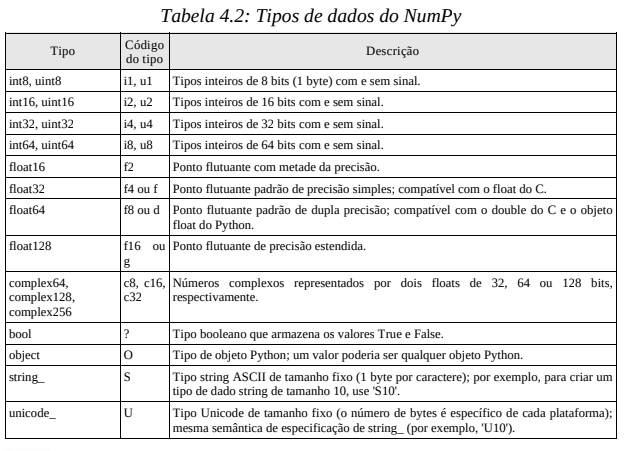

Você pode converter ou executar o casting de um array de um tipo de dado para outro de maneira explícita usando o método `astype` do ndarray:

In [26]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [27]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [28]:
float_arr.dtype

dtype('float64')

Se fizer o casting de alguns números de ponto flutuante para o tipo de dado inteiro, a parte decimal será truncada:

In [29]:
arr = np.array([3.7, -1.2, -2.6, 0.5,12.9,10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [30]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

### Aritmética com arrays NumPy

Os arrays são importantes porque permitem expressar operações em lote com os dados sem ser preciso escrever nenhum loop `for`. Isso se chama *vetorização*

In [36]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [37]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [38]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

As operações aritméticas com escalares propagam o argumento escalar para cada elemento do array:

In [39]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr **2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

As comparações entre arrays de mesmo tamanho geram arrays booleanos:

In [42]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [43]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Indexação e fatiamento básicos

Os arrays unidimensionais são simples; superficialmente eles se comportam de modo semelhante às listas Python:

In [2]:
import numpy as np

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
arr[5]

np.int64(5)

In [5]:
arr[5:8]

array([5, 6, 7])

In [7]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

### Indexação com fatias

Os *ndarrays* podem ser fatiados com a sintaxe conhecida a seguir:

In [8]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [9]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

### Indexação booleana

Consideraremos um exemplo no qual temos alguns dados em um array e um array de nomes com duplicidades:

In [10]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4,7],[0,2],[-5,6],[0,0],[1,2],[-12,-4],[3,4]])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [11]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Suponhamos que cada nome correspondesse a uma linha do array `data` e quiséssemos selecionar todas as linhas cujo nome correspondente fosse "Bob".
Como as operações aritméticas, as comparações (como com `==`) com arrays também são vetorizadas. Logo, comparar `names` com a string "bob" gera um array booleano:

In [12]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

Esse array booleano pode ser passado quando o array for indexado:

In [13]:
data[names == 'Bob']

array([[4, 7],
       [0, 0]])

O array booleano deve ter o mesmo tamanho do eixo de array que ele está indexando. Você pode até mesmo combinar arrays booleanos com fatias ou inteiros (ou sequências de inteiros).

Neste exemplos, estou fazendo a seleção nas linhas em que `names == "Bob"` e também estou indexando as colunas:

In [14]:
data[names == 'Bob', 1:]

array([[7],
       [0]])

In [15]:
data[names == 'Bob', 1]

array([7, 0])

Para selecionar tudo, exceto "Bob", você pode usar `!=` ou negar a condição utilizando `~`:

In [16]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [17]:
~(names == 'Bob')

array([False,  True,  True, False,  True,  True,  True])

In [18]:
data[~(names == 'Bob')]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

O operador `~` pode ser útil quando você quiser inverter um array booleano referenciado por uma variável:

In [19]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

A definição de valores com arrays booleanos funciona pela transferência do valor ou dos valores que estiverem no lado direito para os locais em que os valores do array booleano forem `True`. Para configurar todos os valores negativos de `data`com 0, só precisamos fazer o seguinte:

In [20]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

Você também pode definir linhas ou colunas inteiras usando um array booleano unidimensional:

In [21]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

> Esses tipos de operações com dados bidimensionais são mais convenientes com o pandas.

### Indexação sofisticada

*Indexação sofisticada (fancy indexing)* é um termo adotado pelo NumPy para descrever a indexação com o uso de arrays de inteiros.

In [22]:
arr = np.zeros((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Para selecionar um subconjunto das linhas em uma ordem específica, basta passar uma listaa ou um ndarray de inteiros especificando a ordem desejada:

In [23]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Usar índices negativos seleciona as linhas a partir do final:

In [24]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passar arrays com vários índices produz um resultado um pouco diferente; é selecionado um array unidimensional de elementos correspondentes a cada tupla de índices:

In [25]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [26]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

Aqui os elementos `(1,0), (5,3), (7,1)` e `(2,2)` foram selecionados. O resultado da indexação sofisticada com um número de arrays de inteiros equivalente ao número de eixos é sempre unidimensional.

> Lembre-se de que a indexação sofisticada, ao contrário do fatiamento, sempre copia os dados em um novo array ao atribuir o resultado a uma nova variável.

### Transposição de arrays e troca de eixos

A transposição é uma forma especial de reformatação que também retorna uma visualização dos dados subjacentes, sem fazer nenhuma cópia. Os arrays têm o método **`transpose`** e o atributo especial **`T`**:

In [27]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [28]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Ao fazer cálculos com matrizes, talvez você use esse recurso com alguma frequência - por exemplo, ao calcular o produto da matriz interna usando

`
numpy.dot
`

In [29]:
arr = np.array([[0,1,0],[1,2,-2],[6,3,2],[-1,0,-1],[1,0,1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [30]:
np.dot(arr.T,arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

O operador infixo @ é outra maneira para fazermos a multiplicação de matrizes:

In [32]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

A transposição simples com `.T` é um caso especial de troca de eixos. O ndarray tem o método **`swapaxes`**, que recebe um par de números de eixos e troca os eixos indicados para reorganizar os dados:

In [33]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [34]:
arr.swapaxes(0,1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

> **`swapaxes`** também retorna uma visualização dos dados sem fazer cópia.